kurs waluty usd
                  mid              no
effectiveDate                        
2019-09-02     3.9819  169/A/NBP/2019
2019-09-03     3.9882  170/A/NBP/2019
2019-09-04     3.9414  171/A/NBP/2019
2019-09-05     3.9330  172/A/NBP/2019
2019-09-06     3.9315  173/A/NBP/2019
kurs waluty eur
                  mid              no
effectiveDate                        
2019-09-02     4.3691  169/A/NBP/2019
2019-09-03     4.3667  170/A/NBP/2019
2019-09-04     4.3385  171/A/NBP/2019
2019-09-05     4.3409  172/A/NBP/2019
2019-09-06     4.3392  173/A/NBP/2019
kurs usd .info() i .describe()
<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2019-09-02 to 2019-09-30
Data columns (total 2 columns):
mid    21 non-null float64
no     21 non-null object
dtypes: float64(1), object(1)
memory usage: 504.0+ bytes
None
             mid
count  21.000000
mean    3.954800
std     0.034119
min     3.911600
25%     3.931500
50%     3.936200
75%     3.985600
max     4.015400
kurs eur .info() i .des

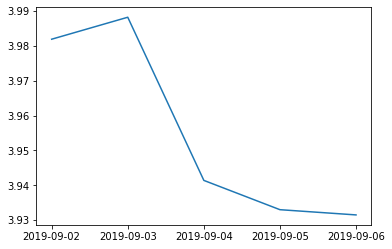

wykres waluty eur


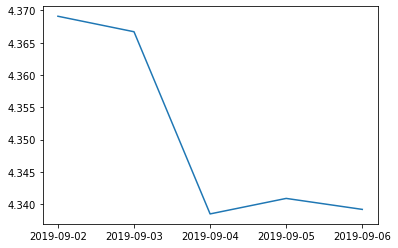

korelacja wybranych kursów
[[1.         0.97515429]
 [0.97515429 1.        ]]


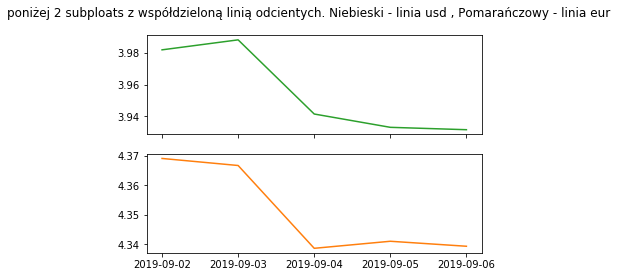

In [2]:
# Zadanie 1
# 1. Napisz funkcję do wczytywania waluty nbp z zadanego okresu (wszystko przekazywane jako parametr)
#    dowolny ze sposobów (plik csv, read_json, dowolne inne)
# 2. Używając stworzonej funkcji wczytaj dane dwóch wybranych przez siebie kursów
# 3. Zbadaj wczytane dane za pomocą wybranych poleceń, oczyść jeżeli to konieczne i ustaw indeksy na datę.
#    Plus za konwersję do typu data/czas
# 4. Użyj funkcji corrcoef z pakietu numpy żeby obliczyć wzajemną korelację wybranych kursów
# 5. Zweryfikuj związek z punktu wyżej rysując wykresy obydwu wybranych przez siebie walut
#    Plus za wykorzystanie funkcji plt.subplot()

#imports
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#get function
def getValue(currency, fromDate, toDate): 
    getData = requests.get('http://api.nbp.pl/api/exchangerates/rates/A/'+currency+'/'+fromDate+'/'+toDate).json()
    course = pd.DataFrame.from_dict(getData['rates'])
    course['effectiveDate'].astype('datetime64')
    course.set_index('effectiveDate', inplace=True)
    return course
#return value 
data_usd = getValue('USD','2019-09-01','2019-09-30')
data_eur = getValue('EUR','2019-09-01','2019-09-30')
#print first 5 table column
print('kurs waluty usd')
print(data_usd.head())
print('kurs waluty eur')
print(data_eur.head())
#print .info() and .describe() for usd course
print('kurs usd .info() i .describe()')
print(data_usd.info())
print(data_usd.describe())
#print .info() and .describe() for eur course
print('kurs eur .info() i .describe()')
print(data_eur.info())
print(data_eur.describe())

#clean array from 'no' values
data_usd = getValue('USD','2019-09-01','2019-09-30')
data_eur = getValue('EUR','2019-09-01','2019-09-30')
data_usd_cleaned = data_usd['mid'].head()
data_eur_cleaned = data_eur['mid'].head()

#print cleaned table 
print('kurs waluty usd po oczyszczeniu ')
print(data_usd_cleaned)
print('kurs waluty eur po oczyszczeniu')
print(data_eur_cleaned)

#print usd course graph
plt.plot(data_usd_cleaned)
print('wykres waluty usd')
plt.show()

#print eur course graph
plt.plot(data_eur_cleaned)
print('wykres waluty eur')
plt.show()

#print course correlation
print('korelacja wybranych kursów')
print(np.corrcoef(data_usd_cleaned,data_eur_cleaned))

#draw a 2 graph of courses with subplots
draw, (draw_usd, draw_eur) = plt.subplots(2, sharex=True)
draw.suptitle('poniżej 2 subploats z współdzieloną linią odcientych. Niebieski - linia usd , Pomarańczowy - linia eur')
draw_usd.plot(data_usd_cleaned, 'tab:green')
draw_eur.plot(data_eur_cleaned, 'tab:orange')
plt.show()

